In [ ]:
!pip3 install pandas seaborn plotly matplotlib numpy missingno 
!pip3 install bubbly



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python3.13 -m pip install --upgrade pip
error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this erro

In [1]:

# necessary imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [3]:
df = pd.read_csv('/Users/kuntal/Desktop/AUTO-Insurance-Claims/claims-data.csv')
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   0   32         740518          2/18/11           OH   
1                   1   29         357949          5/24/06           OH   
2                   1   33         388616          12/6/95           OH   
3                   1   33         162004          9/19/95           IL   
4                   2   20         480094           3/9/03           IN   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0   500/1000               1000                1377.04               0   
1   500/1000                500                 854.58               0   
2    250/500               2000                1391.63               0   
3    250/500                500                 903.32               0   
4   500/1000               1000                1189.98         4000000   

   insured_zip  ... injury_claim property_claim vehicle_claim auto_make  \
0       441363  ...         6620           6620         26480    Accura   
1       612826  ...         7890          23670         55230     Honda   
2       466390  ...         6940           6940         55520  Mercedes   
3       451184  ...         6340           3170         22190    Toyota   
4       613327  ...         4030           8060         36270      Audi   

   auto_model  car_price  Vehicle claim % of car price auto_year  \
0         MDX      46900                     56.460554      2002   
1         CRV      45000                    122.733333      2003   
2        C300      44000                    126.181818      2000   
3  Highlander      46965                     47.247951      2006   
4          A5      55000                     65.945455      2000   

  fraud_reported Unnamed: 41  
0              N         NaN  
1              N         NaN  
2              N         NaN  
3              N         NaN  
4              N         NaN  

[5 rows x 42 columns]

In [4]:
# we can see some missing values denoted by '?' so lets replace missing values with np.nan
df.replace('?', np.nan, inplace = True)

In [5]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1002.000000  1002.000000    1002.000000        1002.000000   
mean           203.898204    38.942116  545151.345309        1134.730539   
std            115.004893     9.132100  257955.543704         611.912527   
min              0.000000    19.000000    1000.000000         500.000000   
25%            116.000000    32.000000  335006.750000         500.000000   
50%            199.000000    38.000000  531985.000000        1000.000000   
75%            276.000000    44.000000  758466.000000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1002.000000    1.002000e+03    1002.000000    1002.000000   
mean             1257.622565    1.108782e+06  501084.664671   25141.417166   
std               245.436697    2.301705e+06   71688.803230   27846.437960   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1090.102500    0.000000e+00  448298.000000       0.000000   
50%              1257.595000    0.000000e+00  466391.500000       0.000000   
75%              1415.995000    0.000000e+00  603234.750000   51000.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  ...  bodily_injuries  \
count    1002.000000               1002.000000  ...      1002.000000   
mean   -26841.217565                 11.654691  ...         0.994012   
std     28096.124919                  6.948542  ...         0.820543   
min   -111100.000000                  0.000000  ...         0.000000   
25%    -51475.000000                  6.000000  ...         0.000000   
50%    -24200.000000                 12.000000  ...         1.000000   
75%         0.000000                 17.000000  ...         2.000000   
max         0.000000                 23.000000  ...         2.000000   

         witnesses  total_claim_amount  injury_claim  property_claim  \
count  1002.000000         1002.000000   1002.000000     1002.000000   
mean      1.486028        52751.037924   7427.165669     7401.966068   
std       1.110437        26376.272530   4878.080471     4820.201934   
min       0.000000          100.000000      0.000000        0.000000   
25%       1.000000        41887.500000   4300.000000     4460.000000   
50%       1.000000        57935.000000   6770.000000     6755.000000   
75%       2.000000        70570.000000  11295.000000    10875.000000   
max       3.000000       114920.000000  21450.000000    23670.000000   

       vehicle_claim      car_price  Vehicle claim % of car price  \
count    1002.000000    1002.000000                   1002.000000   
mean    37921.906188   50048.270459                     81.133822   
std     18868.034141   15216.849682                     46.470889   
min        70.000000   26030.000000                      0.200000   
25%     30352.500000   42000.000000                     54.946941   
50%     42080.000000   46982.500000                     85.182755   
75%     50787.500000   55000.000000                    108.576652   
max     79560.000000  129595.000000                    266.666667   

         auto_year  Unnamed: 41  
count  1002.000000          0.0  
mean   2005.104790          NaN  
std       6.009981          NaN  
min    1995.000000          NaN  
25%    2000.000000          NaN  
50%    2005.000000          NaN  
75%    2010.000000          NaN  
max    2015.000000          NaN  

[8 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   months_as_customer            1002 non-null   int64  
 1   age                           1002 non-null   int64  
 2   policy_number                 1002 non-null   int64  
 3   policy_bind_date              1002 non-null   object 
 4   policy_state                  1002 non-null   object 
 5   policy_csl                    1002 non-null   object 
 6   policy_deductable             1002 non-null   int64  
 7   policy_annual_premium         1002 non-null   float64
 8   umbrella_limit                1002 non-null   int64  
 9   insured_zip                   1002 non-null   int64  
 10  insured_sex                   1002 non-null   object 
 11  insured_education_level       1002 non-null   object 
 12  insured_occupation            1002 non-null   object 
 13  ins

# Data Pre-Processing

In [7]:
# missing values
df.isna().sum()


months_as_customer                 0
age                                0
policy_number                      0
policy_bind_date                   0
policy_state                       0
policy_csl                         0
policy_deductable                  0
policy_annual_premium              0
umbrella_limit                     0
insured_zip                        0
insured_sex                        0
insured_education_level            0
insured_occupation                 0
insured_hobbies                    0
insured_relationship               0
capital-gains                      0
capital-loss                       0
incident_date                      0
incident_type                      0
collision_type                     0
incident_severity                  0
authorities_contacted             91
incident_state                     0
incident_city                      0
incident_location                  0
incident_hour_of_the_day           0
number_of_vehicles_involved        0
p

# Visualizing Missing Values


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python3.13 -m pip install --upgrade pip
error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this erro

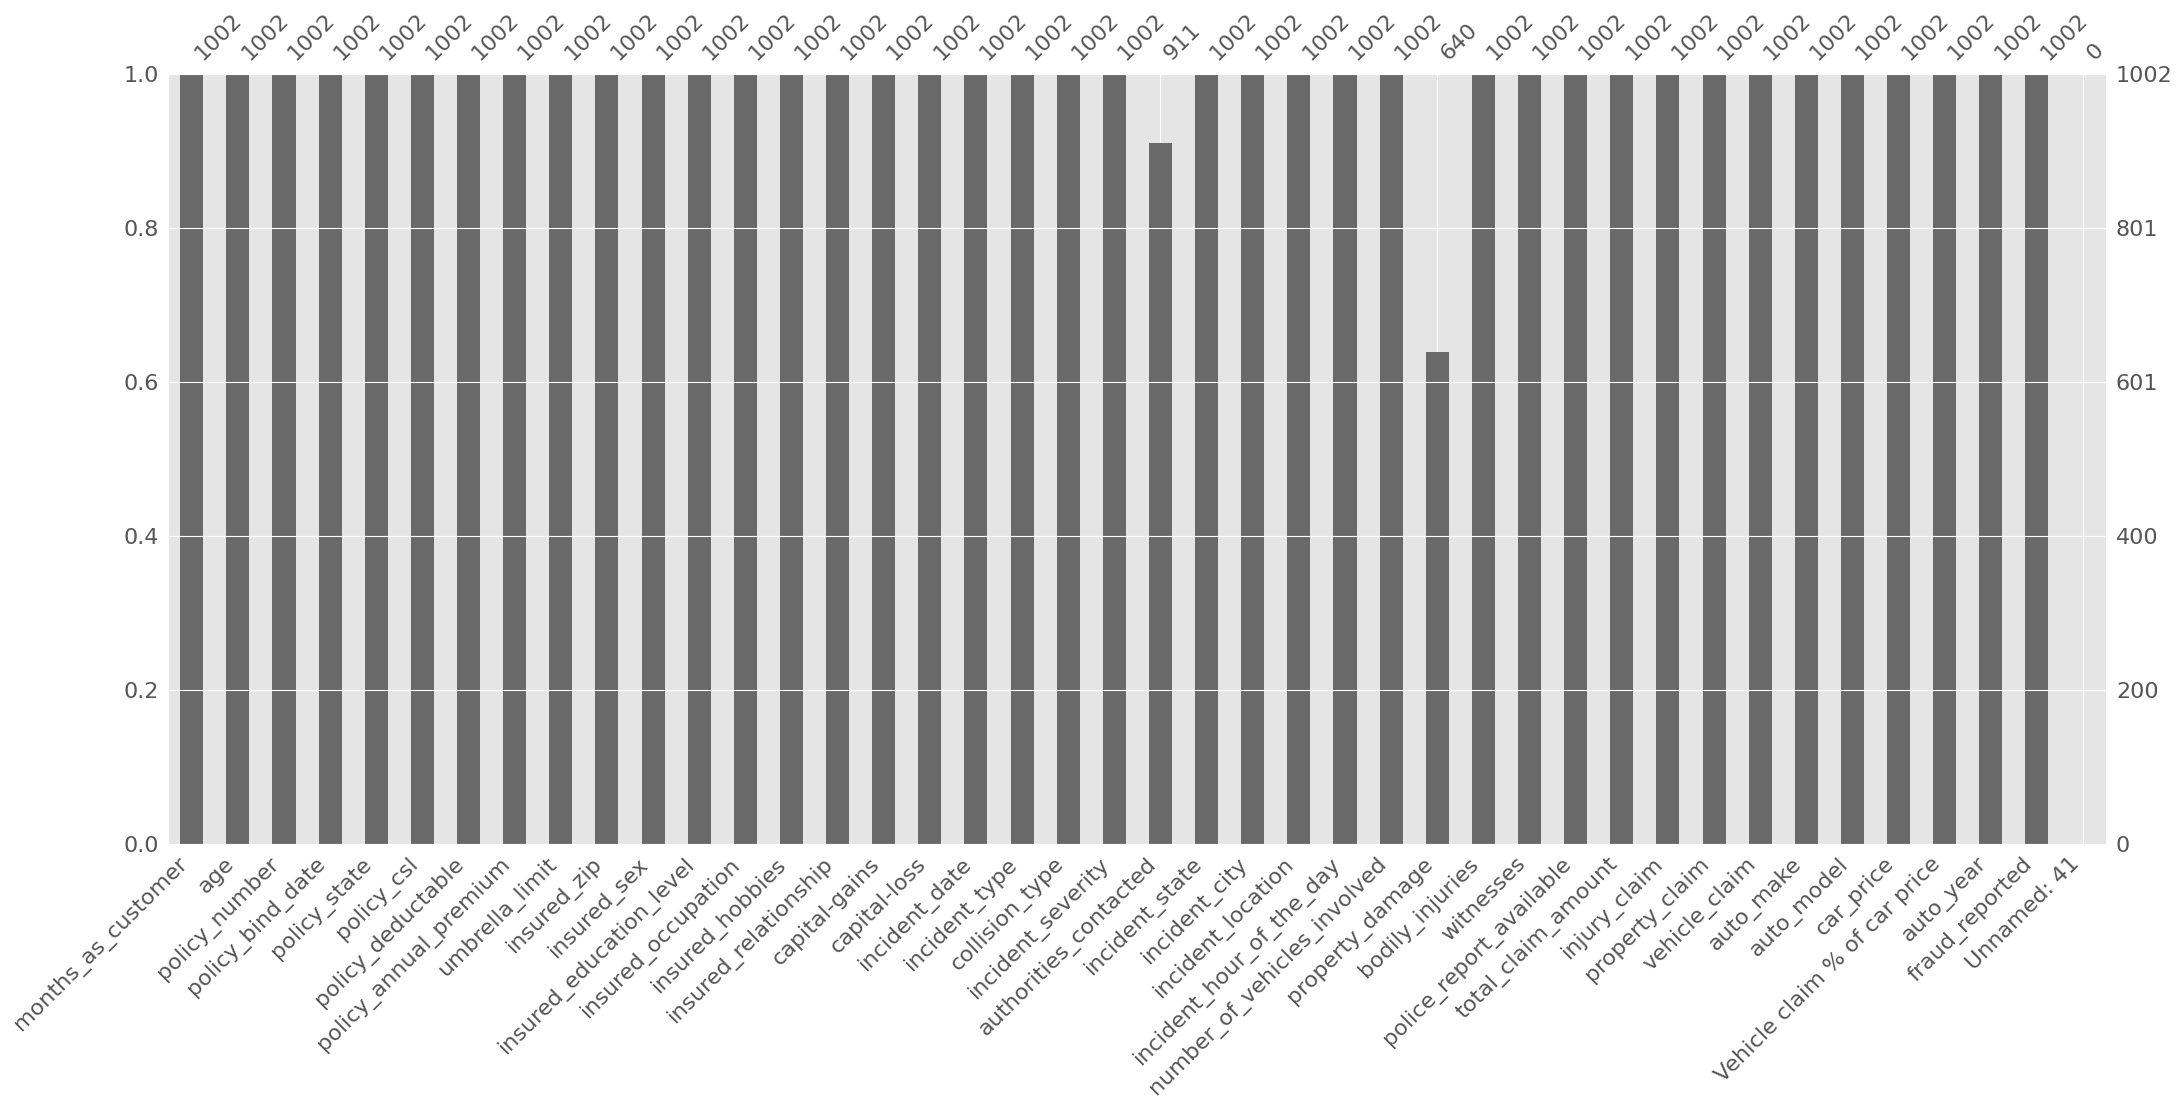

In [13]:
!pip3 install missingno

import missingno as msno

msno.bar(df)
plt.show()

<AxesSubplot: xlabel='property_claim', ylabel='fraud_reported'>

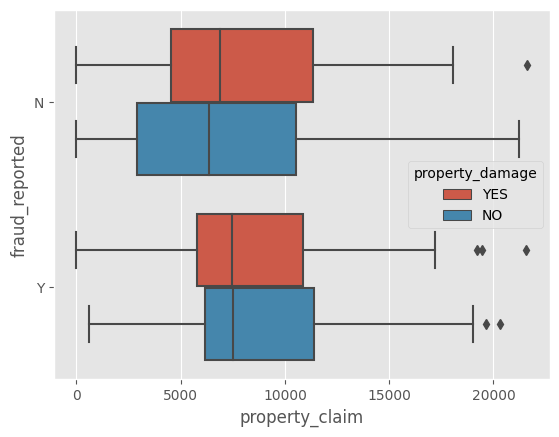

In [16]:
# Boxplot chart 
sns.boxplot(x='property_claim', y='fraud_reported', hue='property_damage', data=df)

In [19]:
# for animated visualizations
from bubbly.bubbly import bubbleplot


import plotly_express as px

ModuleNotFoundError: No module named 'bubbly'

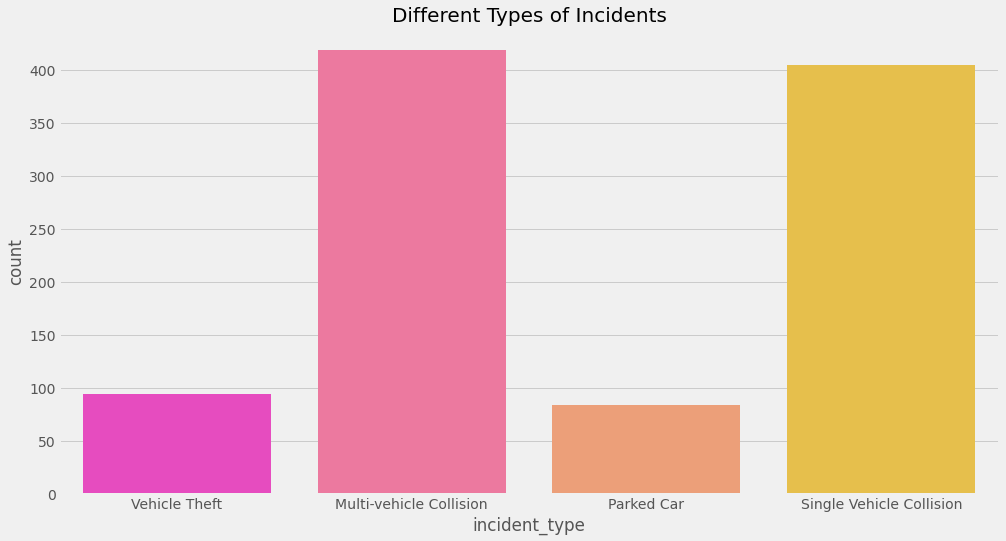

In [10]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['incident_type'], palette = 'spring')
plt.title('Different Types of Incidents', fontsize = 20)
plt.show()

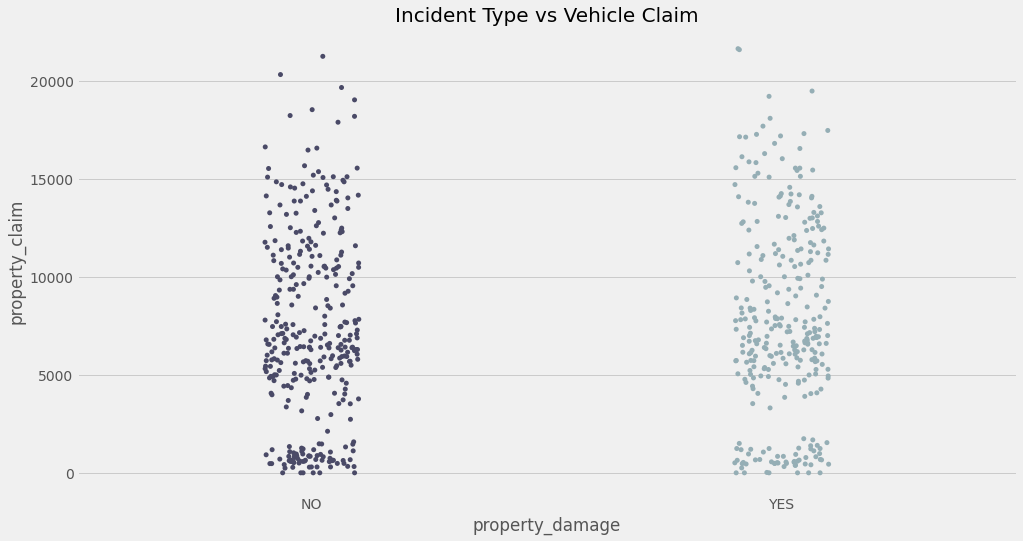

In [11]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
sns.stripplot(df['property_damage'], df['property_claim'], palette = 'bone')
plt.title('Incident Type vs Vehicle Claim', fontsize = 20)
plt.show()

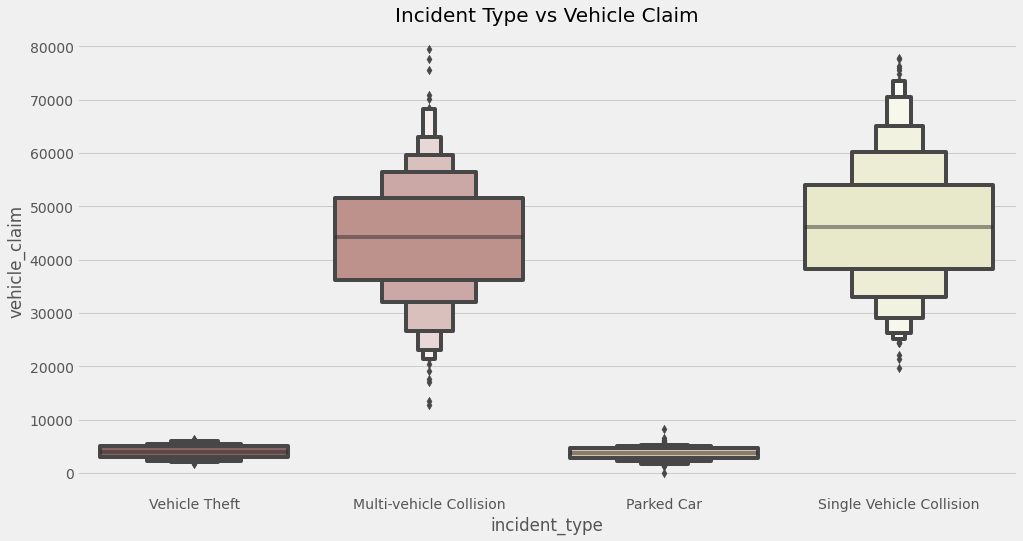

In [12]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
sns.boxenplot(df['incident_type'], df['vehicle_claim'], palette = 'pink')
plt.title('Incident Type vs Vehicle Claim', fontsize = 20)
plt.show()

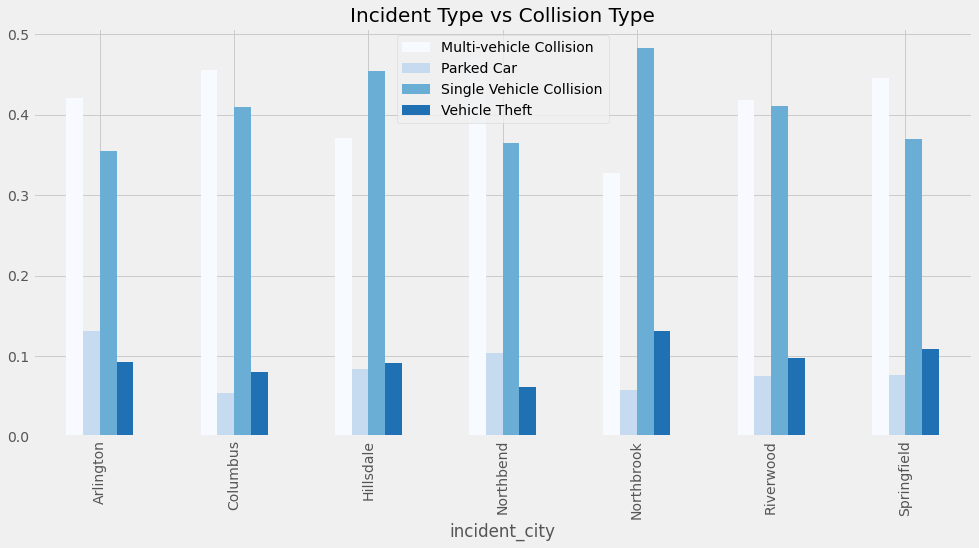

In [13]:
incident = pd.crosstab(df['incident_city'], df['incident_type'])
colors = plt.cm.Blues(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
stacked = False,
figsize = (15, 7),
color = colors)
plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

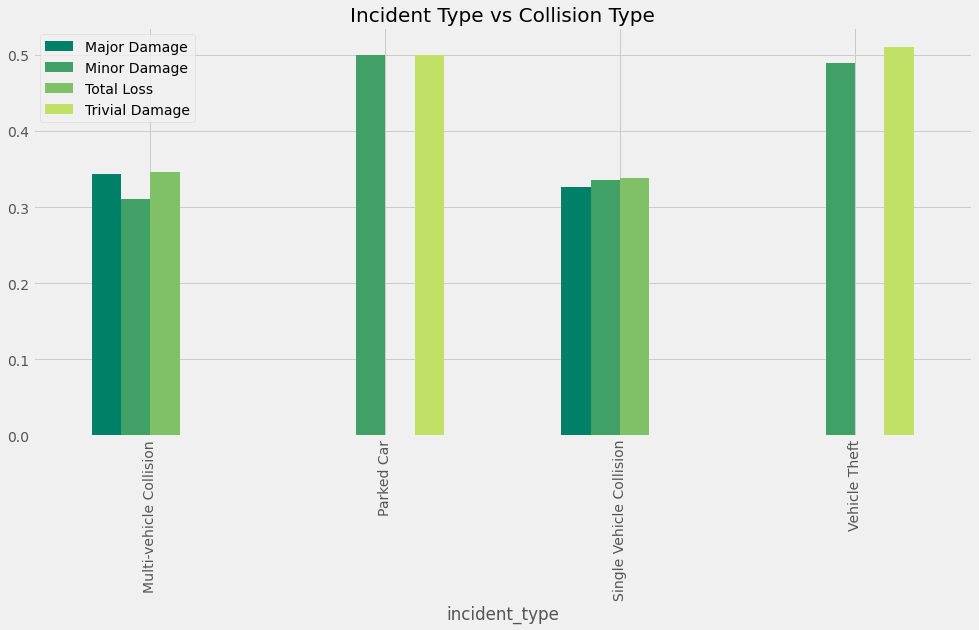

In [14]:
incident = pd.crosstab(df['incident_type'], df['incident_severity'])
colors = plt.cm.summer(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
stacked = False,
figsize = (15, 7),
color = colors)
plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

In [15]:
# plotting a scatter plot
fig = px.scatter(df, x = 'total_claim_amount', y = 'policy_annual_premium', color = 'insured_sex',
marginal_x = 'rug', marginal_y = 'histogram')
fig.show()

In [16]:
fig = px.scatter_matrix(df, dimensions=["injury_claim", "property_claim", "vehicle_claim","Vehicle claim % of car price"],
color = "insured_sex")
fig.show()

In [17]:
# for interactive visualizations
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

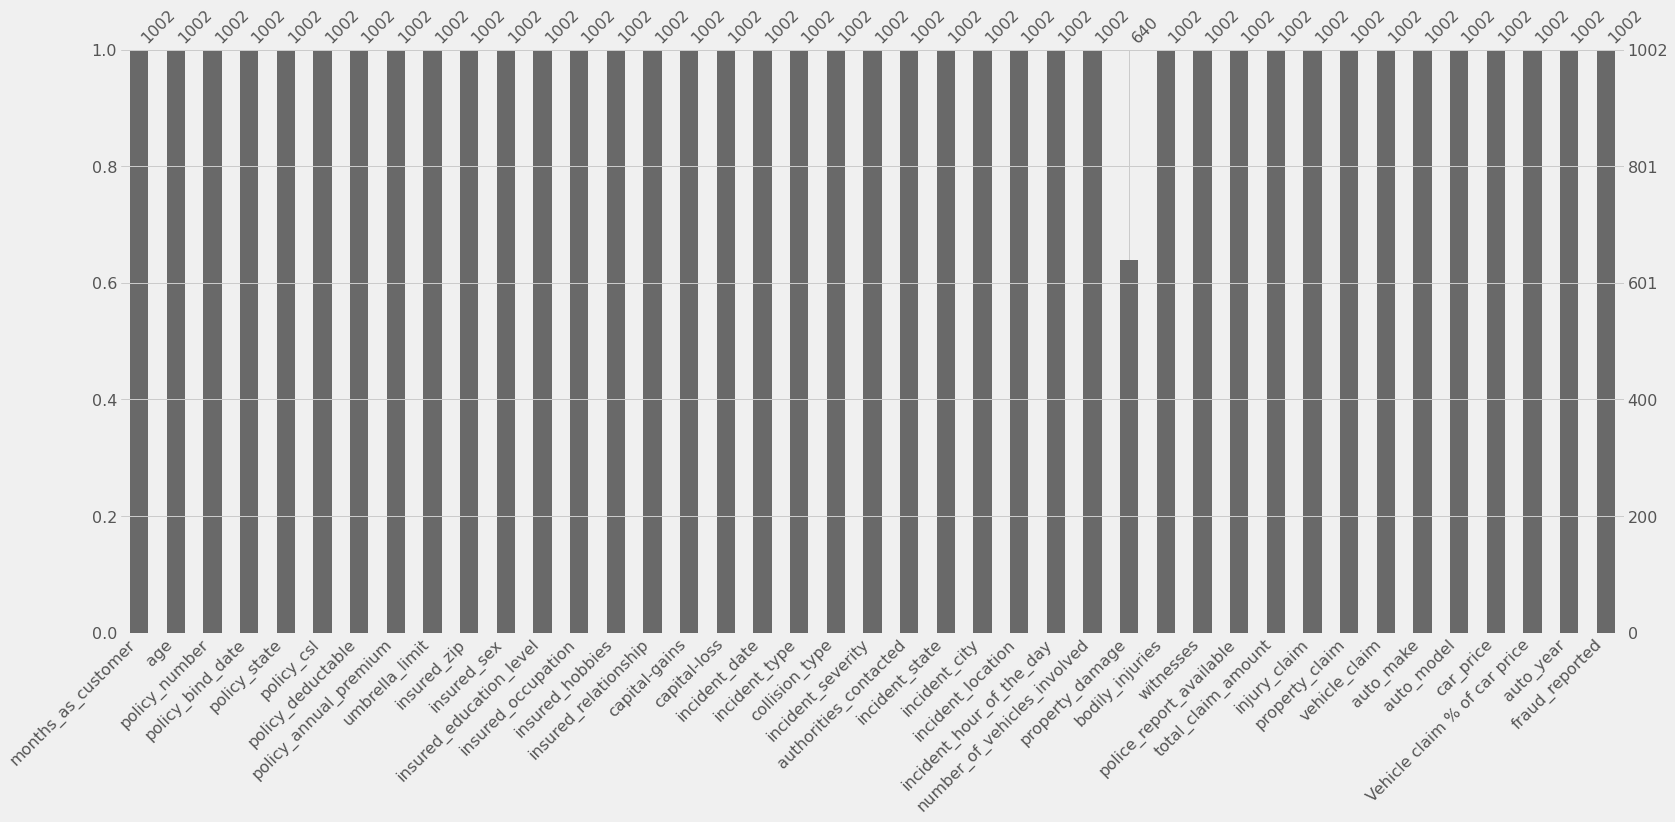

In [18]:
import missingno as msno

msno.bar(df)
plt.show()

# Handling missing values

In [19]:
round(100*(df['collision_type'].value_counts(normalize=True,dropna=False)),2)

Rear Collision     29.34
Side Collision     27.54
Front Collision    25.35
Non Collision      17.76
Name: collision_type, dtype: float64

In [20]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [21]:
### Checking unique values for collosion type

round(100*(df['property_damage'].value_counts(normalize=True,dropna=False)),2)

NaN    36.13
NO     33.73
YES    30.14
Name: property_damage, dtype: float64

In [22]:
### If there was property loss,then the report would have been filed.So,we can consider missing value as "NO"
###Imputing with "NO"
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [23]:
### Checking unique values for collosion type

round(100*(df['police_report_available'].value_counts(normalize=True,dropna=False)),2)

NO     68.46
YES    31.54
Name: police_report_available, dtype: float64

In [24]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [25]:
### Checking missing value again

round(100*(df.isnull().sum()/len(df.index)),2)

months_as_customer              0.0
age                             0.0
policy_number                   0.0
policy_bind_date                0.0
policy_state                    0.0
policy_csl                      0.0
policy_deductable               0.0
policy_annual_premium           0.0
umbrella_limit                  0.0
insured_zip                     0.0
insured_sex                     0.0
insured_education_level         0.0
insured_occupation              0.0
insured_hobbies                 0.0
insured_relationship            0.0
capital-gains                   0.0
capital-loss                    0.0
incident_date                   0.0
incident_type                   0.0
collision_type                  0.0
incident_severity               0.0
authorities_contacted           0.0
incident_state                  0.0
incident_city                   0.0
incident_location               0.0
incident_hour_of_the_day        0.0
number_of_vehicles_involved     0.0
property_damage             

In [26]:
df.isna().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted           0
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [27]:
#plt.figure(figsize=[5,4])
fig = px.pie(df,names='fraud_reported')
fig.show()

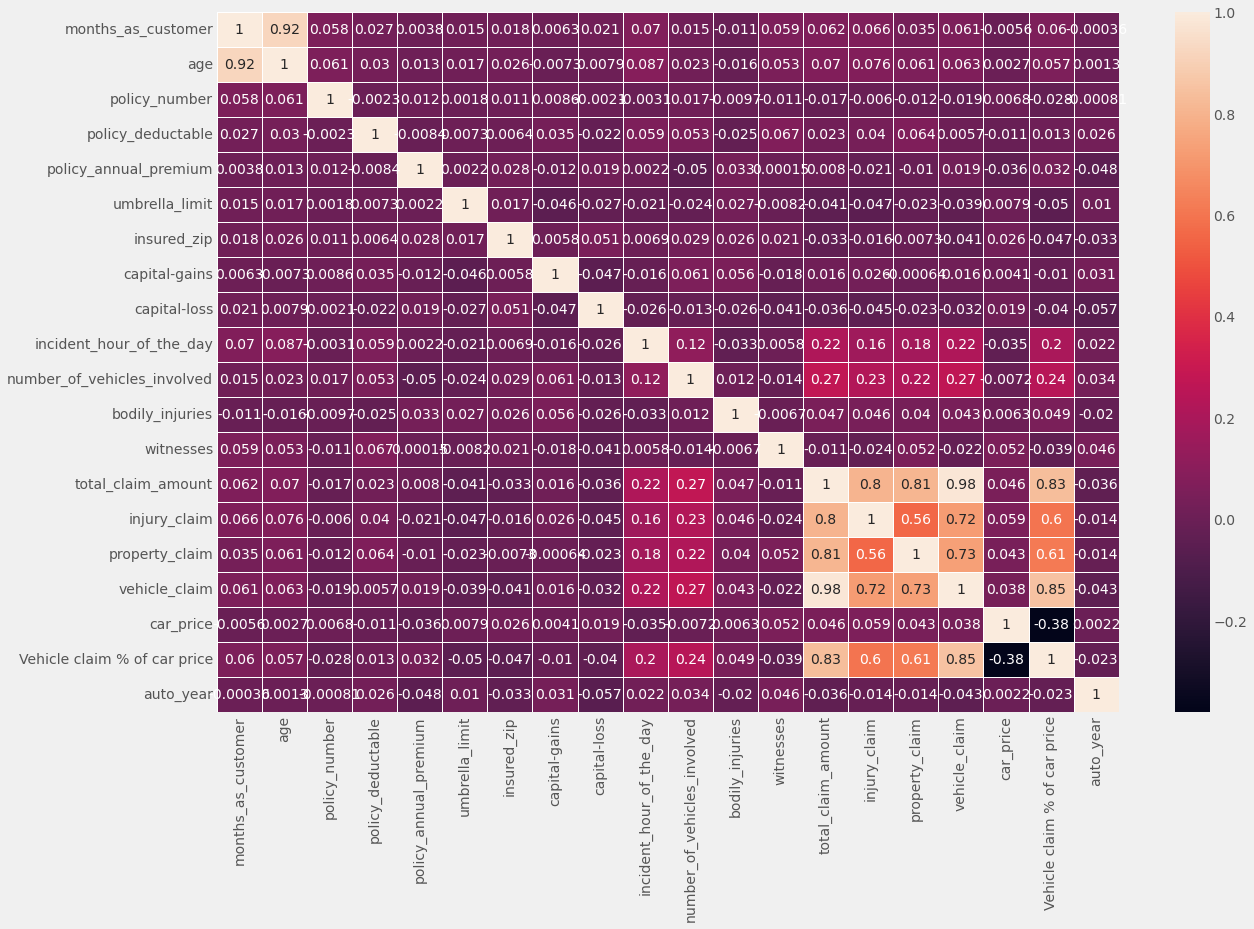

In [28]:
# heatmap

plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [29]:
df.nunique()

months_as_customer               391
age                               46
policy_number                   1002
policy_bind_date                 951
policy_state                       3
policy_csl                         3
policy_deductable                  3
policy_annual_premium            991
umbrella_limit                    11
insured_zip                      995
insured_sex                        2
insured_education_level            7
insured_occupation                14
insured_hobbies                   20
insured_relationship               6
capital-gains                    338
capital-loss                     354
incident_date                     60
incident_type                      4
collision_type                     4
incident_severity                  4
authorities_contacted              5
incident_state                     7
incident_city                      7
incident_location               1000
incident_hour_of_the_day          24
number_of_vehicles_involved        4
p

In [30]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

df.drop(to_drop, inplace = True, axis = 1)

In [31]:
df.head()

months_as_customer  age policy_csl  policy_deductable  \
0                 398   55    250/500                500   
1                  66   30   500/1000                500   
2                 217   41   500/1000               2000   
3                 103   29   500/1000                500   
4                 157   32    100/300               2000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                 862.19               0        MALE             High School   
1                 484.67               0      FEMALE                 College   
2                 875.15               0      FEMALE               Associate   
3                 914.85               0        MALE               Associate   
4                 617.11               0        MALE                 College   

  insured_occupation insured_relationship  ...  bodily_injuries  witnesses  \
0       adm-clerical            unmarried  ...                2          3   
1       adm-clerical                 wife  ...                0          2   
2  machine-op-inspct            own-child  ...                1          2   
3     prof-specialty       other-relative  ...                2          3   
4      other-service       other-relative  ...                1          2   

  police_report_available total_claim_amount injury_claim property_claim  \
0                      NO               6600          600           1200   
1                     YES              65560        11920          11920   
2                      NO              37840            0           4730   
3                      NO               7110          790           1580   
4                      NO              50800        10160           5080   

   vehicle_claim  car_price Vehicle claim % of car price  fraud_reported  
0           4800      46900                    10.234542               N  
1          41720      52500                    79.466667               Y  
2          33110      44000                    75.250000               N  
3           4740      46900                    10.106610               N  
4          35560      54250                    65.548387               Y  

[5 rows x 29 columns]

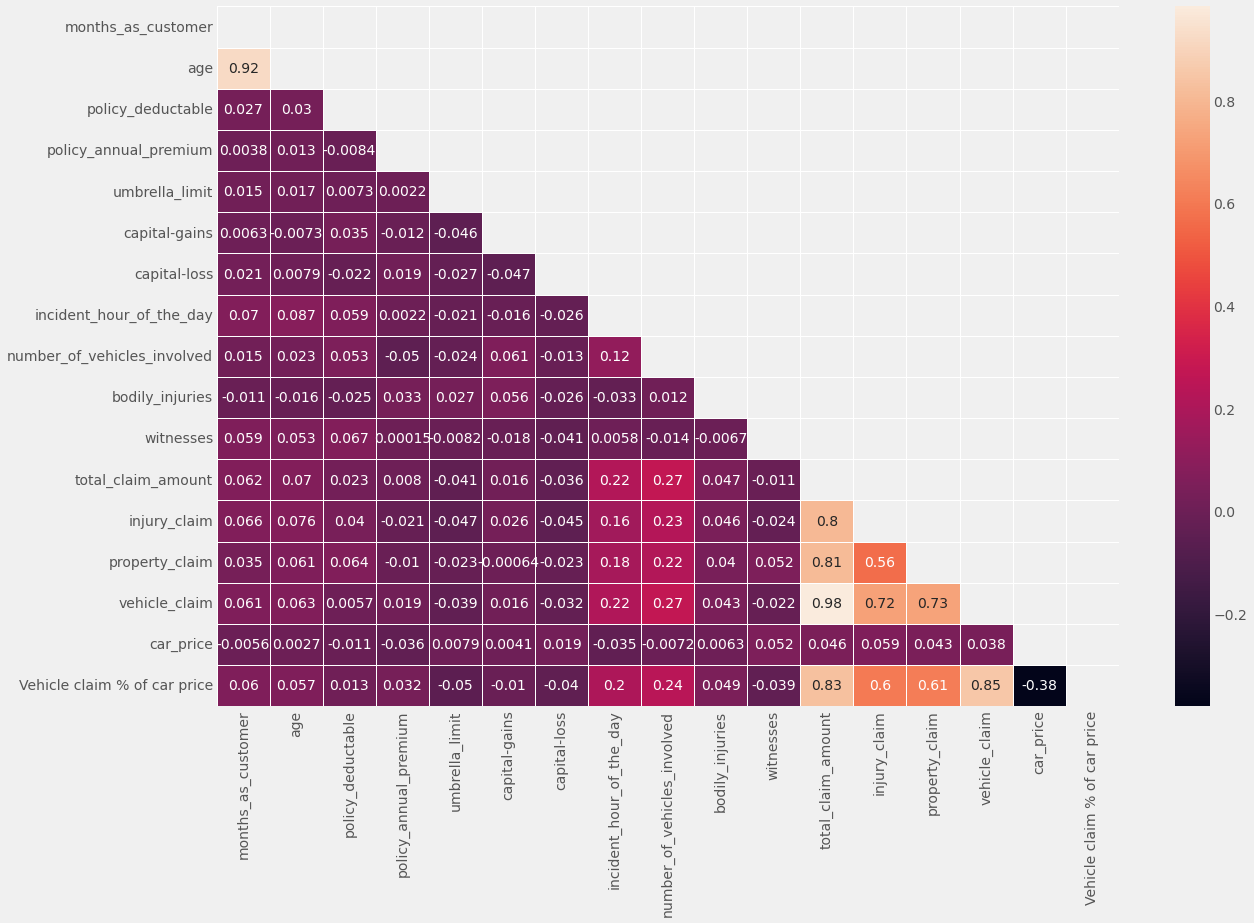

In [32]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()


# Drop

In [33]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [34]:
df.head()

months_as_customer policy_csl  policy_deductable  policy_annual_premium  \
0                 398    250/500                500                 862.19   
1                  66   500/1000                500                 484.67   
2                 217   500/1000               2000                 875.15   
3                 103   500/1000                500                 914.85   
4                 157    100/300               2000                 617.11   

   umbrella_limit insured_sex insured_education_level insured_occupation  \
0               0        MALE             High School       adm-clerical   
1               0      FEMALE                 College       adm-clerical   
2               0      FEMALE               Associate  machine-op-inspct   
3               0        MALE               Associate     prof-specialty   
4               0        MALE                 College      other-service   

  insured_relationship  capital-gains  ...  property_damage bodily_injuries  \
0            unmarried          69400  ...               NO               2   
1                 wife          21100  ...               NO               0   
2            own-child          46700  ...               NO               1   
3       other-relative          72100  ...               NO               2   
4       other-relative              0  ...               NO               1   

  witnesses police_report_available injury_claim  property_claim  \
0         3                      NO          600            1200   
1         2                     YES        11920           11920   
2         2                      NO            0            4730   
3         3                      NO          790            1580   
4         2                      NO        10160            5080   

   vehicle_claim car_price  Vehicle claim % of car price  fraud_reported  
0           4800     46900                     10.234542               N  
1          41720     52500                     79.466667               Y  
2          33110     44000                     75.250000               N  
3           4740     46900                     10.106610               N  
4          35560     54250                     65.548387               Y  

[5 rows x 27 columns]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   months_as_customer            1002 non-null   int64  
 1   policy_csl                    1002 non-null   object 
 2   policy_deductable             1002 non-null   int64  
 3   policy_annual_premium         1002 non-null   float64
 4   umbrella_limit                1002 non-null   int64  
 5   insured_sex                   1002 non-null   object 
 6   insured_education_level       1002 non-null   object 
 7   insured_occupation            1002 non-null   object 
 8   insured_relationship          1002 non-null   object 
 9   capital-gains                 1002 non-null   int64  
 10  capital-loss                  1002 non-null   int64  
 11  incident_type                 1002 non-null   object 
 12  collision_type                1002 non-null   object 
 13  inc

In [36]:
# separating the feature and target columns
X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [37]:
X.head()

months_as_customer policy_csl  policy_deductable  policy_annual_premium  \
0                 398    250/500                500                 862.19   
1                  66   500/1000                500                 484.67   
2                 217   500/1000               2000                 875.15   
3                 103   500/1000                500                 914.85   
4                 157    100/300               2000                 617.11   

   umbrella_limit insured_sex insured_education_level insured_occupation  \
0               0        MALE             High School       adm-clerical   
1               0      FEMALE                 College       adm-clerical   
2               0      FEMALE               Associate  machine-op-inspct   
3               0        MALE               Associate     prof-specialty   
4               0        MALE                 College      other-service   

  insured_relationship  capital-gains  ...  number_of_vehicles_involved  \
0            unmarried          69400  ...                            1   
1                 wife          21100  ...                            3   
2            own-child          46700  ...                            3   
3       other-relative          72100  ...                            1   
4       other-relative              0  ...                            3   

  property_damage bodily_injuries witnesses police_report_available  \
0              NO               2         3                      NO   
1              NO               0         2                     YES   
2              NO               1         2                      NO   
3              NO               2         3                      NO   
4              NO               1         2                      NO   

   injury_claim  property_claim vehicle_claim  car_price  \
0           600            1200          4800      46900   
1         11920           11920         41720      52500   
2             0            4730         33110      44000   
3           790            1580          4740      46900   
4         10160            5080         35560      54250   

   Vehicle claim % of car price  
0                     10.234542  
1                     79.466667  
2                     75.250000  
3                     10.106610  
4                     65.548387  

[5 rows x 26 columns]

In [38]:
y.head()

0    N
1    Y
2    N
3    N
4    Y
Name: fraud_reported, dtype: object

# Encoding Categorical columns

In [39]:
# extracting categorical columns
cat_df = X.select_dtypes(include = ['object'])

In [40]:
cat_df.head()

policy_csl insured_sex insured_education_level insured_occupation  \
0    250/500        MALE             High School       adm-clerical   
1   500/1000      FEMALE                 College       adm-clerical   
2   500/1000      FEMALE               Associate  machine-op-inspct   
3   500/1000        MALE               Associate     prof-specialty   
4    100/300        MALE                 College      other-service   

  insured_relationship            incident_type   collision_type  \
0            unmarried            Vehicle Theft    Non Collision   
1                 wife  Multi-vehicle Collision  Front Collision   
2            own-child  Multi-vehicle Collision   Side Collision   
3       other-relative               Parked Car    Non Collision   
4       other-relative  Multi-vehicle Collision  Front Collision   

  incident_severity authorities_contacted property_damage  \
0    Trivial Damage                Police              NO   
1      Major Damage                  Fire              NO   
2        Total Loss                Police              NO   
3      Minor Damage                Police              NO   
4      Major Damage                 Other              NO   

  police_report_available  
0                      NO  
1                     YES  
2                      NO  
3                      NO  
4                      NO

In [41]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '500/1000' '100/300']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['High School' 'College' 'Associate' 'JD' 'PhD' 'MD' 'Masters']

insured_occupation: 
['adm-clerical' 'machine-op-inspct' 'prof-specialty' 'other-service'
 'protective-serv' 'tech-support' 'armed-forces' 'transport-moving'
 'sales' 'priv-house-serv' 'exec-managerial' 'craft-repair'
 'handlers-cleaners' 'farming-fishing']

insured_relationship: 
['unmarried' 'wife' 'own-child' 'other-relative' 'not-in-family' 'husband']

incident_type: 
['Vehicle Theft' 'Multi-vehicle Collision' 'Parked Car'
 'Single Vehicle Collision']

collision_type: 
['Non Collision' 'Front Collision' 'Side Collision' 'Rear Collision']

incident_severity: 
['Trivial Damage' 'Major Damage' 'Total Loss' 'Minor Damage']

authorities_contacted: 
['Police' 'Fire' 'Other' 'Ambulance' 'None']

property_damage: 
['NO' 'YES']

police_report_available: 
['NO' 'YES']



In [42]:
cat_df = pd.get_dummies(cat_df, drop_first = True)
cat_df.head()

policy_csl_250/500  policy_csl_500/1000  insured_sex_MALE  \
0                   1                    0                 1   
1                   0                    1                 0   
2                   0                    1                 0   
3                   0                    1                 1   
4                   0                    0                 1   

   insured_education_level_College  insured_education_level_High School  \
0                                0                                    1   
1                                1                                    0   
2                                0                                    0   
3                                0                                    0   
4                                1                                    0   

   insured_education_level_JD  insured_education_level_MD  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   insured_education_level_Masters  insured_education_level_PhD  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                0                            0   

   insured_occupation_armed-forces  ...  collision_type_Side Collision  \
0                                0  ...                              0   
1                                0  ...                              0   
2                                0  ...                              1   
3                                0  ...                              0   
4                                0  ...                              0   

   incident_severity_Minor Damage  incident_severity_Total Loss  \
0                               0                             0   
1                               0                             0   
2                               0                             1   
3                               1                             0   
4                               0                             0   

   incident_severity_Trivial Damage  authorities_contacted_Fire  \
0                                 1                           0   
1                                 0                           1   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   

   authorities_contacted_None  authorities_contacted_Other  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            1   

   authorities_contacted_Police  property_damage_YES  \
0                             1                    0   
1                             0                    0   
2                             1                    0   
3                             1                    0   
4                             0                    0   

   police_report_available_YES  
0                            0  
1                            1  
2                            0  
3                            0  
4                            0  

[5 rows x 42 columns]

In [43]:
# extracting the numerical columns

num_df = X.select_dtypes(include = ['int64'])
num_df.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0                 398                500               0          69400   
1                  66                500               0          21100   
2                 217               2000               0          46700   
3                 103                500               0          72100   
4                 157               2000               0              0   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         7                            1   
1        -60800                         2                            3   
2             0                        15                            3   
3             0                         5                            1   
4        -54100                        14                            3   

   bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  \
0                2          3           600            1200           4800   
1                0          2         11920           11920          41720   
2                1          2             0            4730          33110   
3                2          3           790            1580           4740   
4                1          2         10160            5080          35560   

   car_price  
0      46900  
1      52500  
2      44000  
3      46900  
4      54250

In [44]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_df, cat_df], axis = 1)
X.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0                 398                500               0          69400   
1                  66                500               0          21100   
2                 217               2000               0          46700   
3                 103                500               0          72100   
4                 157               2000               0              0   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         7                            1   
1        -60800                         2                            3   
2             0                        15                            3   
3             0                         5                            1   
4        -54100                        14                            3   

   bodily_injuries  witnesses  injury_claim  ...  \
0                2          3           600  ...   
1                0          2         11920  ...   
2                1          2             0  ...   
3                2          3           790  ...   
4                1          2         10160  ...   

   collision_type_Side Collision  incident_severity_Minor Damage  \
0                              0                               0   
1                              0                               0   
2                              1                               0   
3                              0                               1   
4                              0                               0   

   incident_severity_Total Loss  incident_severity_Trivial Damage  \
0                             0                                 1   
1                             0                                 0   
2                             1                                 0   
3                             0                                 0   
4                             0                                 0   

   authorities_contacted_Fire  authorities_contacted_None  \
0                           0                           0   
1                           1                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   authorities_contacted_Other  authorities_contacted_Police  \
0                            0                             1   
1                            0                             0   
2                            0                             1   
3                            0                             1   
4                            1                             0   

   property_damage_YES  police_report_available_YES  
0                    0                            0  
1                    0                            1  
2                    0                            0  
3                    0                            0  
4                    0                            0  

[5 rows x 55 columns]

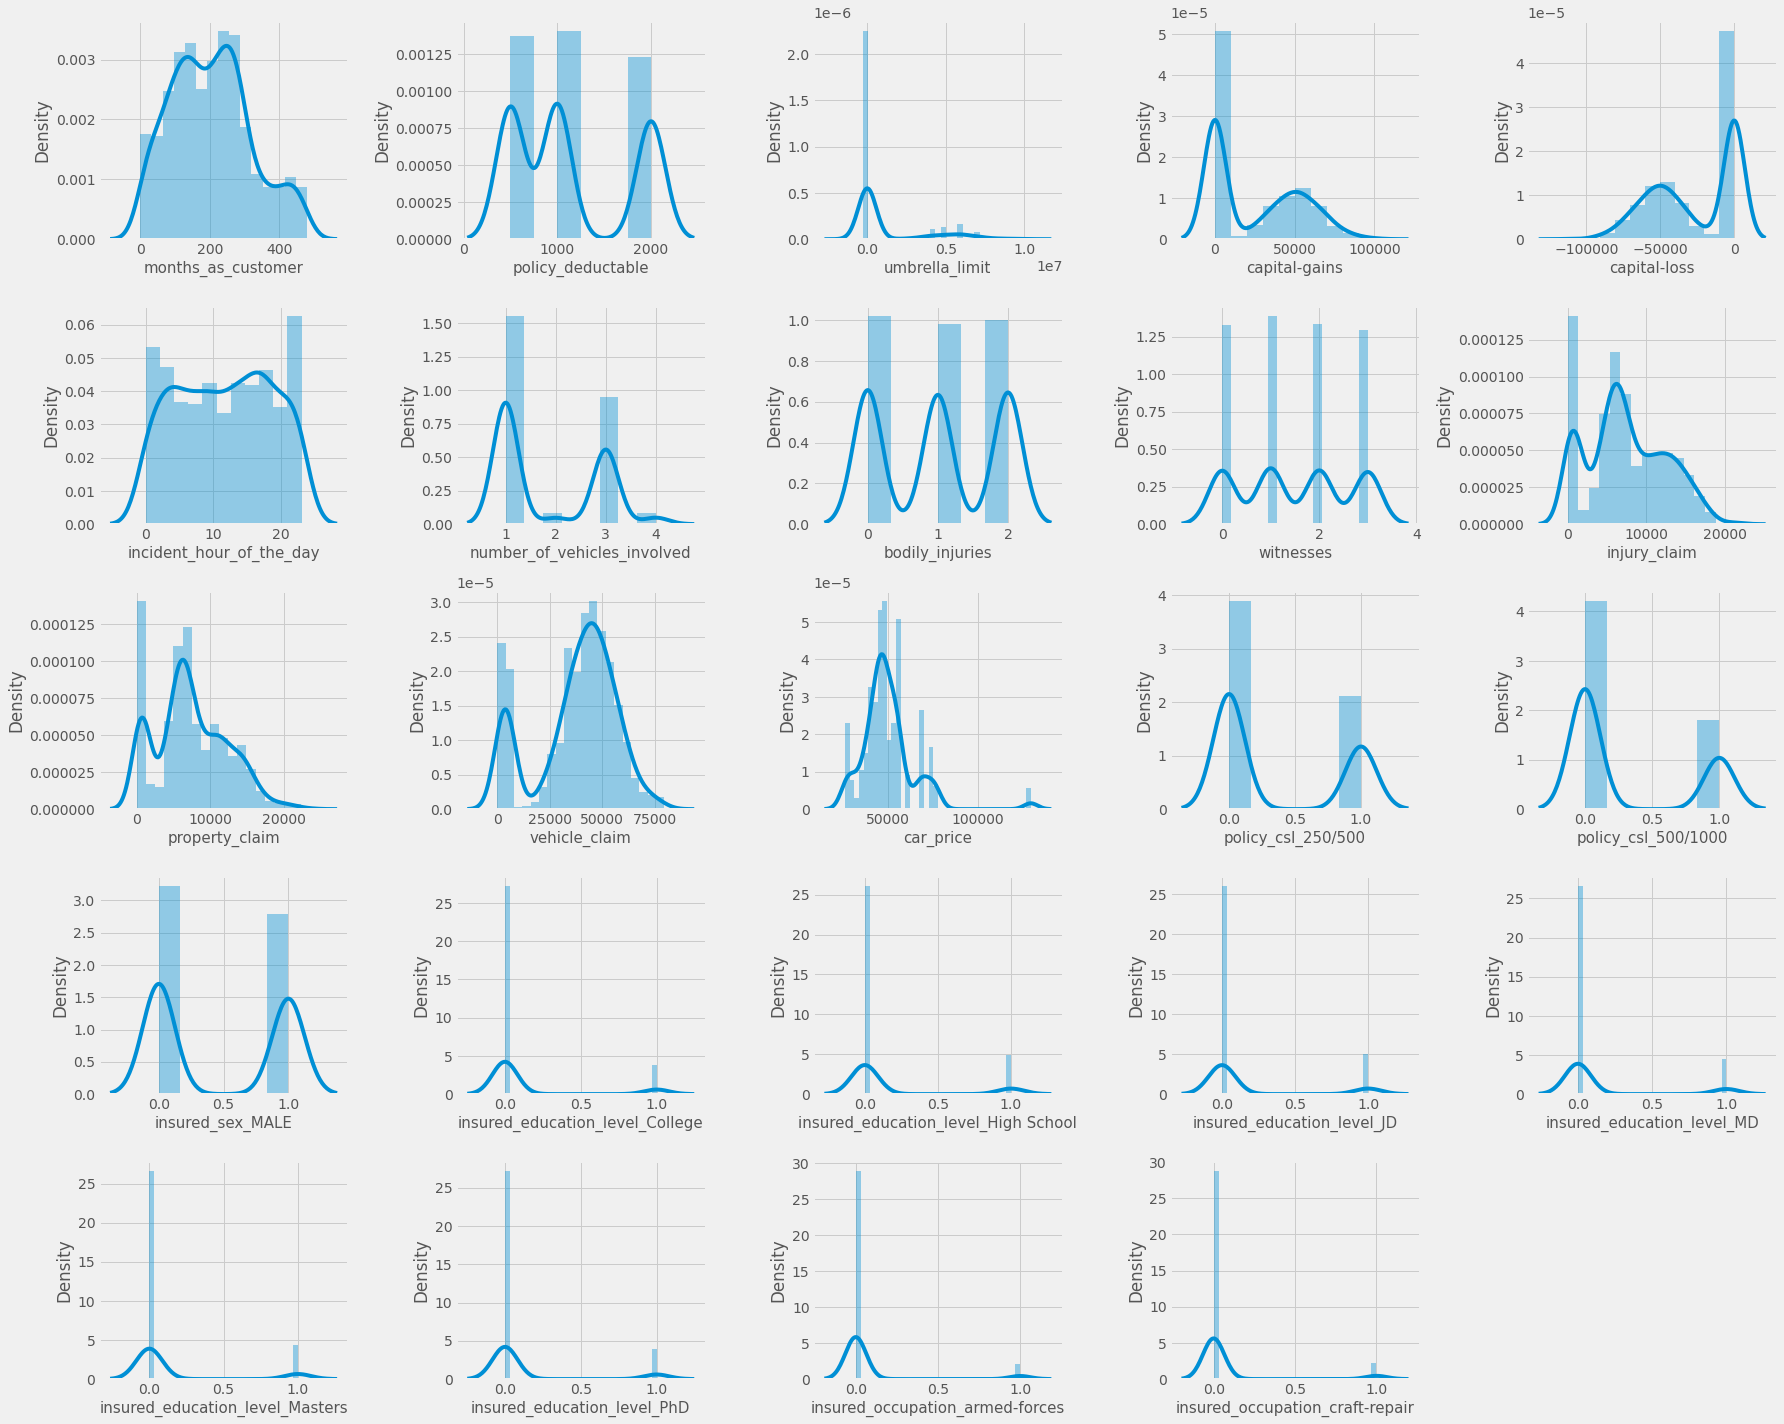

In [45]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

# Outliers Detection

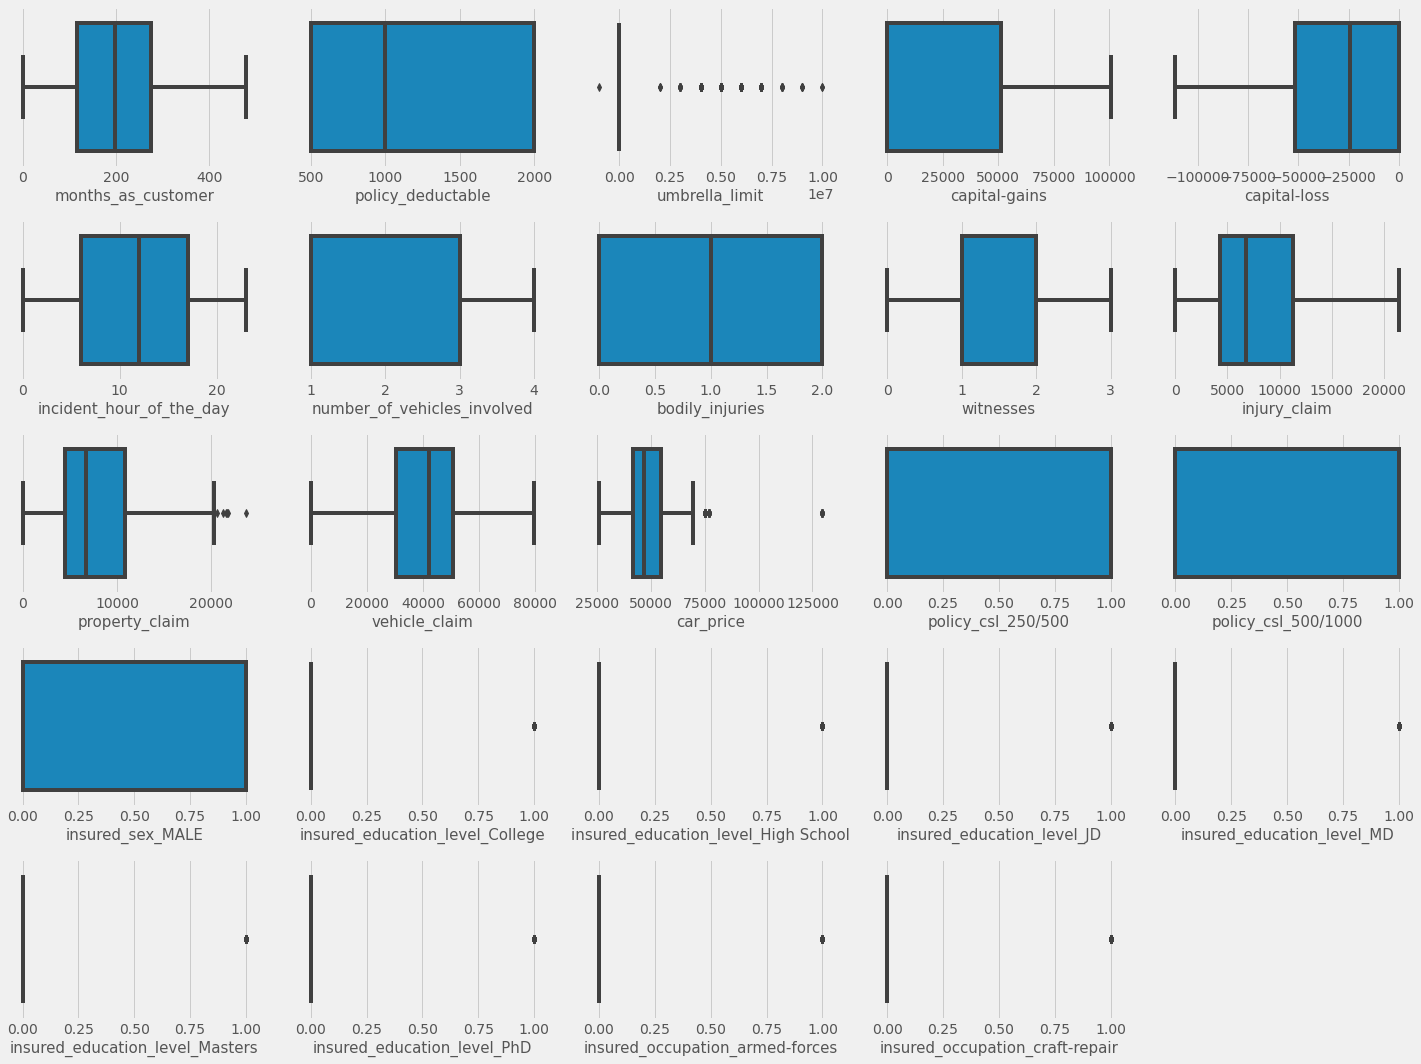

In [46]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [47]:
# let's encode the fraud report to numerical values
#df['fraud_reported'] = df['fraud_reported'].replace(('Y','N'),(0,1))
#df

# Outliers are present in some numerical columns we will scale numerical columns later

In [48]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [49]:
X_train.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
172                 210                500               0              0   
0                   398                500               0          69400   
489                 215               1000               0          40000   
770                  96               2000               0          10000   
514                 446               2000               0          42700   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
172        -41000                        12                            3   
0               0                         7                            1   
489        -43400                         6                            1   
770             0                         9                            1   
514        -64900                        10                            3   

     bodily_injuries  witnesses  injury_claim  ...  \
172                2          0         14740  ...   
0                  2          3           600  ...   
489                2          1           220  ...   
770                2          3          7120  ...   
514                0          0          6280  ...   

     collision_type_Side Collision  incident_severity_Minor Damage  \
172                              0                               0   
0                                0                               0   
489                              0                               0   
770                              0                               0   
514                              0                               0   

     incident_severity_Total Loss  incident_severity_Trivial Damage  \
172                             1                                 0   
0                               0                                 1   
489                             0                                 1   
770                             1                                 0   
514                             1                                 0   

     authorities_contacted_Fire  authorities_contacted_None  \
172                           0                           0   
0                             0                           0   
489                           0                           1   
770                           0                           0   
514                           0                           0   

     authorities_contacted_Other  authorities_contacted_Police  \
172                            1                             0   
0                              0                             1   
489                            0                             0   
770                            0                             0   
514                            0                             1   

     property_damage_YES  police_report_available_YES  
172                    0                            0  
0                      0                            0  
489                    0                            0  
770                    1                            0  
514                    0                            0  

[5 rows x 55 columns]

In [50]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [51]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [52]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
172            0.034068          -1.019236       -0.472306      -0.901451   
0              1.664004          -1.019236       -0.472306       1.596519   
489            0.077417          -0.197942       -0.472306       0.538301   
770           -0.954298           1.444647       -0.472306      -0.541513   
514            2.080158           1.444647       -0.472306       0.635485   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
172     -0.483778                  0.047206                     1.122514   
0        0.966449                 -0.664671                    -0.826637   
489     -0.568669                 -0.807047                    -0.826637   
770      0.966449                 -0.379921                    -0.826637   
514     -1.329154                 -0.237545                     1.122514   

     bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  
172         1.272584  -1.355729      1.501912        1.536019       0.725895  
0           1.272584   1.323620     -1.398178       -1.288794      -1.741564  
489         1.272584  -0.462613     -1.476115       -1.447351      -1.890276  
770         1.272584   1.323620     -0.060937        1.431705       1.009081  
514        -1.181101  -1.355729     -0.233219        1.081211       0.323529

In [53]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [54]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [55]:
X_train.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
172            0.034068          -1.019236       -0.472306      -0.901451   
0              1.664004          -1.019236       -0.472306       1.596519   
489            0.077417          -0.197942       -0.472306       0.538301   
770           -0.954298           1.444647       -0.472306      -0.541513   
514            2.080158           1.444647       -0.472306       0.635485   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
172     -0.483778                  0.047206                     1.122514   
0        0.966449                 -0.664671                    -0.826637   
489     -0.568669                 -0.807047                    -0.826637   
770      0.966449                 -0.379921                    -0.826637   
514     -1.329154                 -0.237545                     1.122514   

     bodily_injuries  witnesses  injury_claim  ...  \
172         1.272584  -1.355729      1.501912  ...   
0           1.272584   1.323620     -1.398178  ...   
489         1.272584  -0.462613     -1.476115  ...   
770         1.272584   1.323620     -0.060937  ...   
514        -1.181101  -1.355729     -0.233219  ...   

     collision_type_Side Collision  incident_severity_Minor Damage  \
172                              0                               0   
0                                0                               0   
489                              0                               0   
770                              0                               0   
514                              0                               0   

     incident_severity_Total Loss  incident_severity_Trivial Damage  \
172                             1                                 0   
0                               0                                 1   
489                             0                                 1   
770                             1                                 0   
514                             1                                 0   

     authorities_contacted_Fire  authorities_contacted_None  \
172                           0                           0   
0                             0                           0   
489                           0                           1   
770                           0                           0   
514                           0                           0   

     authorities_contacted_Other  authorities_contacted_Police  \
172                            1                             0   
0                              0                             1   
489                            0                             0   
770                            0                             0   
514                            0                             1   

     property_damage_YES  police_report_available_YES  
172                    0                            0  
0                      0                            0  
489                    0                            0  
770                    1                            0  
514                    0                            0  

[5 rows x 55 columns]

# Fit the Models


In [56]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [57]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.7470039946737683
Test accuracy of Support Vector Classifier is : 0.7729083665338645
[[194   0]
 [ 57   0]]
              precision    recall  f1-score   support

           N       0.77      1.00      0.87       194
           Y       0.00      0.00      0.00        57

    accuracy                           0.77       251
   macro avg       0.39      0.50      0.44       251
weighted avg       0.60      0.77      0.67       251



# KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [59]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.7470039946737683
Test accuracy of KNN is : 0.7729083665338645
[[194   0]
 [ 57   0]]
              precision    recall  f1-score   support

           N       0.77      1.00      0.87       194
           Y       0.00      0.00      0.00        57

    accuracy                           0.77       251
   macro avg       0.39      0.50      0.44       251
weighted avg       0.60      0.77      0.67       251



# Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [61]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.3665338645418327
[[ 63 131]
 [ 28  29]]
              precision    recall  f1-score   support

           N       0.69      0.32      0.44       194
           Y       0.18      0.51      0.27        57

    accuracy                           0.37       251
   macro avg       0.44      0.42      0.35       251
weighted avg       0.58      0.37      0.40       251



In [62]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [63]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2}
0.8095452538631346


In [64]:
# best estimator 

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

In [65]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.8122503328894807
Test accuracy of Decision Tree is : 0.7609561752988048
[[149  45]
 [ 15  42]]
              precision    recall  f1-score   support

           N       0.91      0.77      0.83       194
           Y       0.48      0.74      0.58        57

    accuracy                           0.76       251
   macro avg       0.70      0.75      0.71       251
weighted avg       0.81      0.76      0.78       251



# Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

In [67]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.9587217043941412
Test accuracy of Random Forest is : 0.8087649402390438
[[173  21]
 [ 27  30]]
              precision    recall  f1-score   support

           N       0.86      0.89      0.88       194
           Y       0.59      0.53      0.56        57

    accuracy                           0.81       251
   macro avg       0.73      0.71      0.72       251
weighted avg       0.80      0.81      0.80       251



# Ada Boost Classifier

In [68]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                min_samples_leaf=8)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [69]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 10, 'n_estimators': 50}
0.806878587196468


In [70]:
# best estimator 

ada = grid_search.best_estimator_

y_pred = ada.predict(X_test)

In [71]:
# accuracy_score, confusion_matrix and classification_report

ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Ada Boost is : {ada_train_acc}")
print(f"Test accuracy of Ada Boost is : {ada_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Ada Boost is : 0.2529960053262317
Test accuracy of Ada Boost is : 0.22709163346613545
[[  0 194]
 [  0  57]]
              precision    recall  f1-score   support

           N       0.00      0.00      0.00       194
           Y       0.23      1.00      0.37        57

    accuracy                           0.23       251
   macro avg       0.11      0.50      0.19       251
weighted avg       0.05      0.23      0.08       251



# Gradient Boosting Classifier

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.9360852197070573
Test Accuracy of Gradient Boosting Classifier is 0.6693227091633466 

Confusion Matrix :- 
[[130  64]
 [ 19  38]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.87      0.67      0.76       194
           Y       0.37      0.67      0.48        57

    accuracy                           0.67       251
   macro avg       0.62      0.67      0.62       251
weighted avg       0.76      0.67      0.69       251



In [73]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Support Vector Classifier', svc), ('KNN', knn),  ('Decision Tree', dtc), ('Random Forest', rand_clf),
               ('Ada Boost', ada), ('Gradient Boosting Classifier', gb)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

# Voting Classifier

In [74]:
# accuracy_score, confusion_matrix and classification_report

vc_train_acc = accuracy_score(y_train, vc.predict(X_train))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Voting Classifier is : 0.7470039946737683
Test accuracy of Voting Classifier is : 0.7729083665338645
[[194   0]
 [ 57   0]]
              precision    recall  f1-score   support

           N       0.77      1.00      0.87       194
           Y       0.00      0.00      0.00        57

    accuracy                           0.77       251
   macro avg       0.39      0.50      0.44       251
weighted avg       0.60      0.77      0.67       251



# Models Comparison

In [75]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boost', 'Voting Classifier'],
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc, gb_acc,  vc_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
3      Random Forest  0.808765
0                SVC  0.772908
1                KNN  0.772908
6  Voting Classifier  0.772908
2      Decision Tree  0.760956
5     Gradient Boost  0.669323
4          Ada Boost  0.227092

In [76]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')